In [1]:
### ValDXer testing
import os
os.environ['HDXER_PATH'] = '/home/alexi/Documents/HDXer'


In [2]:

from ValDX.ValidationDX import ValDXer
from ValDX.VDX_Settings import Settings

settings = Settings(name='test_full_actually0.5_celeste_stride100_413_5reps_bigEXPrange')
settings.replicates = 2
settings.gamma_range = (1,6)
settings.train_frac = 0.5
settings.RW_exponent = [0]
settings.stride = 1000
settings.HDXer_stride = 100
settings.RW_do_reweighting = True
import pickle

VDX = ValDXer(settings)
expt_name = 'Experimental'
test_name = "MD_Simulated"


/home/alexi/Documents/ValDX


/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to 'HDXER_ENV' environment: /home/alexi/miniconda3/envs/HDXER_ENV
Experiment name test_full_actually0.5_celeste_stride100_413_5reps_bigEXPrange already exists. Attempting to change name to test_full_actually0.5_celeste_stride100_413_5reps_bigEXPrange0
Experiment name test_full_actually0.5_celeste_stride100_413_5reps_bigEXPrange already exists. Attempting to change name to test_full_actually0.5_celeste_stride100_413_5reps_bigEXPrange1
Experiment name test_full_actually0.5_celeste_stride100_413_5reps_bigEXPrange already exists. Attempting to change name to test_full_actually0.5_celeste_stride100_413_5reps_bigEXPrange2
Experiment name test_full_actually0.5_celeste_stride100_413_5reps_bigEXPrange already exists. Attempting to change name to test_full_actually0.5_celeste_stride100_413_5reps_bigEXPrange3
Experiment name test_full_actually0.5_celeste_stride100_413_5reps_bigEXPrange already exists. Attempting to change name to test_full_actually0.5_celeste_stride100_413_5reps_bigEXPrange4

In [3]:
import os
print(os.getenv('HDXER_PATH'))


/home/alexi/Documents/HDXer


In [4]:
print(os.environ["HDXER_PATH"])
print(__name__)

/home/alexi/Documents/HDXer
__main__


In [5]:
import subprocess
from ValDX.helpful_funcs import conda_to_env_dict

# Assuming settings.HDXer_env contains the name of your Conda environment
env_path = conda_to_env_dict(settings.HDXer_env)

command = "echo $HDXER_PATH"
print("command:", command)

# Run the command in the subprocess
output = subprocess.run(command, shell=True, env=env_path, capture_output=True, text=True)

# Capture and print the standard output (stdout)
hdxer_path = output.stdout.strip()  # .strip() removes any trailing newline
print("HDXER_PATH:", hdxer_path)


Path to 'HDXER_ENV' environment: /home/alexi/miniconda3/envs/HDXER_ENV
command: echo $HDXER_PATH
HDXER_PATH: /home/alexi/Documents/HDXer


In [6]:
# BPTI data
BPTI_dir = "/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI"
BPTI_dir = "/home/alexi/Documents/ValDX/raw_data/HDXer_tutorial/BPTI"



In [7]:
expt_dir = os.path.join(BPTI_dir, "BPTI_expt_data")

os.listdir(expt_dir)

segs_name = "BPTI_residue_segs.txt"
segs_path = os.path.join(expt_dir, segs_name)

hdx_name = "BPTI_expt_dfracs.dat"
hdx_path = os.path.join(expt_dir, hdx_name)
print(hdx_path)

rates_name = "BPTI_Intrinsic_rates.dat"
rates_path = os.path.join(expt_dir, rates_name)


/home/alexi/Documents/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_expt_data/BPTI_expt_dfracs.dat


In [8]:

VDX.load_HDX_data(HDX_path=hdx_path, SEG_path=segs_path, calc_name=expt_name)
VDX.load_intrinsic_rates(path=rates_path, calc_name=expt_name)


Preparing HDX data for Experimental
Path /home/alexi/Documents/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_expt_data/BPTI_expt_dfracs.dat
AVG: ncol = 6, len(names) = 4


In [9]:
print(VDX.rates)

                                               rates     calc_name
0  {3: 917.89750993, 4: 481.71945087, 5: 5161.716...  Experimental


In [10]:
print(VDX.paths)


                                                 HDX  \
0  /home/alexi/Documents/ValDX/raw_data/HDXer_tut...   
1                                                NaN   

                                                 SEG     calc_name  \
0  /home/alexi/Documents/ValDX/raw_data/HDXer_tut...  Experimental   
1                                                NaN  Experimental   

   experimental                                          int_rates  
0         False                                                NaN  
1         False  /home/alexi/Documents/ValDX/raw_data/HDXer_tut...  


In [11]:
SHAW_dir = "/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein"

dir_list = os.listdir(SHAW_dir)

dcd_list = [i for i in dir_list if i.endswith(".dcd")]
# remove any with small in name
dcd_list = [i for i in dcd_list if not "_str" in i]

dcd_list.sort()
print(dcd_list)
print(len(dcd_list))

['bpti-protein-000.dcd', 'bpti-protein-001.dcd', 'bpti-protein-002.dcd', 'bpti-protein-003.dcd', 'bpti-protein-004.dcd', 'bpti-protein-005.dcd', 'bpti-protein-006.dcd', 'bpti-protein-007.dcd', 'bpti-protein-008.dcd', 'bpti-protein-009.dcd', 'bpti-protein-010.dcd', 'bpti-protein-011.dcd', 'bpti-protein-012.dcd', 'bpti-protein-013.dcd', 'bpti-protein-014.dcd', 'bpti-protein-015.dcd', 'bpti-protein-016.dcd', 'bpti-protein-017.dcd', 'bpti-protein-018.dcd', 'bpti-protein-019.dcd', 'bpti-protein-020.dcd', 'bpti-protein-021.dcd', 'bpti-protein-022.dcd', 'bpti-protein-023.dcd', 'bpti-protein-024.dcd', 'bpti-protein-025.dcd', 'bpti-protein-026.dcd', 'bpti-protein-027.dcd', 'bpti-protein-028.dcd', 'bpti-protein-029.dcd', 'bpti-protein-030.dcd', 'bpti-protein-031.dcd', 'bpti-protein-032.dcd', 'bpti-protein-033.dcd', 'bpti-protein-034.dcd', 'bpti-protein-035.dcd', 'bpti-protein-036.dcd', 'bpti-protein-037.dcd', 'bpti-protein-038.dcd', 'bpti-protein-039.dcd', 'bpti-protein-040.dcd', 'bpti-protein-0

In [12]:
sim_name = "BPTI_SHAW"
top_name = "bpti-protein.pdb"
top_path = os.path.join(SHAW_dir, top_name)
reps = len(dcd_list)
# reps =100

traj_paths = [os.path.join(SHAW_dir, i) for i in dcd_list[:reps]]
print(top_path)
print(traj_paths)


# VDX.load_structures(top_path=top_path, traj_paths=traj_paths, calc_name=sim_name)

/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein.pdb
['/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-000.dcd', '/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-001.dcd', '/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-002.dcd', '/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-003.dcd', '/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-004.dcd', '/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-005.dcd', '/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-006.dcd', '/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-007.dcd', '/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-008.dcd', '/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-009.dcd', '/home/alexi/Doc

In [13]:
import MDAnalysis as mda
from MDAnalysis.coordinates.DCD import DCDWriter  # Import DCDWriter directly

small_traj_paths = []

for rep in range(len(traj_paths)):
    traj = traj_paths[rep]
    u = mda.Universe(top_path, traj)
    print(u.trajectory.n_frames)

    # sample by stride settings.stide

    small_traj_name = traj.replace(".dcd", f"_str{settings.stride}.dcd")

    # Create an AtomGroup from the Universe's selection
    ag = u.select_atoms('all')

    # write traj
    with DCDWriter(small_traj_name, ag.n_atoms) as writer:
        for ts in u.trajectory[::settings.stride]:
            writer.write(ag)

    small_traj_paths.append(small_traj_name)

10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000


/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


10000
10000
10000


10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
1000

In [14]:
print((traj_paths))

['/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-000.dcd', '/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-001.dcd', '/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-002.dcd', '/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-003.dcd', '/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-004.dcd', '/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-005.dcd', '/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-006.dcd', '/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-007.dcd', '/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-008.dcd', '/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-009.dcd', '/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-010.dcd', '/home/al

In [15]:
VDX.load_structures(top_path=top_path, traj_paths=small_traj_paths, calc_name=test_name)


                                                 HDX  \
0  /home/alexi/Documents/ValDX/raw_data/HDXer_tut...   
1                                                NaN   
2                                                NaN   

                                                 SEG     calc_name  \
0  /home/alexi/Documents/ValDX/raw_data/HDXer_tut...  Experimental   
1                                                NaN  Experimental   
2                                                NaN  MD_Simulated   

  experimental                                          int_rates  \
0        False                                                NaN   
1        False  /home/alexi/Documents/ValDX/raw_data/HDXer_tut...   
2          NaN                                                NaN   

                                                 top  \
0                                                NaN   
1                                                NaN   
2  /home/alexi/Documents/DESRES-Trajectory-bpti-p

/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


In [16]:
VDX.paths

,HDX,SEG,calc_name,experimental,int_rates,top,traj
0,/home/alexi/Documents/ValDX/raw_data/HDXer_tut...,/home/alexi/Documents/ValDX/raw_data/HDXer_tut...,Experimental,False,NaN,NaN,NaN
1,NaN,NaN,Experimental,False,/home/alexi/Documents/ValDX/raw_data/HDXer_tut...,NaN,NaN
2,NaN,NaN,MD_Simulated,NaN,NaN,/home/alexi/Documents/DESRES-Trajectory-bpti-p...,[/home/alexi/Documents/DESRES-Trajectory-bpti-...


Random seeds: [42, 43]
Randomly splitting segments for MD_Simulated with random seed 42 and train fraction 0.5
train_segs
    ResStr  ResEnd  peptide             calc_name
24      34      35       24  train_MD_Simulated_1
13      22      23       13  train_MD_Simulated_1
8       17      18        8  train_MD_Simulated_1
25      35      36       25  train_MD_Simulated_1
4       11      12        4  train_MD_Simulated_1
Saved train MD_Simulated_1 segments to /home/alexi/Documents/ValDX/data/test_full_actually0.5_celeste_stride100_413_5reps_bigEXPrange6/train_MD_Simulated_1/train_residue_segs__MD_Simulated_.txt
Train Peptide numbers: [ 0  4  6  8  9 12 13 15 16 17 19 24 25 26 29 32 34 35 39 40]
Saved val MD_Simulated_1 segments to /home/alexi/Documents/ValDX/data/test_full_actually0.5_celeste_stride100_413_5reps_bigEXPrange6/val_MD_Simulated_1/val_residue_segs__MD_Simulated_.txt
Val Peptide numbers: [ 1  2  3  5  7 10 11 14 18 20 21 22 23 27 28 30 31 33 36 37 38]
train_HDX_data
      0.16

Path to 'HDXER_ENV' environment: /home/alexi/miniconda3/envs/HDXER_ENV
python /home/alexi/Documents/HDXer/HDXer/calc_hdx.py -t /home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-000_str1000.dcd /home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-001_str1000.dcd /home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-002_str1000.dcd /home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-003_str1000.dcd /home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-004_str1000.dcd /home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-005_str1000.dcd /home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-006_str1000.dcd /home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-007_str1000.dcd /home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-008_str1000.dcd /home/alexi/Docume

/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis

Path /home/alexi/Documents/ValDX/data/test_full_actually0.5_celeste_stride100_413_5reps_bigEXPrange6/train_MD_Simulated_1/out__train_MD_Simulated_1Segment_average_fractions.dat
AVG: ncol = 6, len(names) = 4
Experimental MD_Simulated True 1
/home/alexi/Documents/ValDX/data/test_full_actually0.5_celeste_stride100_413_5reps_bigEXPrange6/train_MD_Simulated_1/train_MD_Simulated_1_expt_dfracs.dat
/home/alexi/Documents/ValDX/data/test_full_actually0.5_celeste_stride100_413_5reps_bigEXPrange6/train_MD_Simulated_1
/home/alexi/Documents/ValDX/data/test_full_actually0.5_celeste_stride100_413_5reps_bigEXPrange6/train_MD_Simulated_1/out__train_MD_Simulated_1Intrinsic_rates.dat
REWIGHTING train_MD_Simulated_1 with Exponent: 0
[{'do_reweight': True, 'do_params': False, 'stepfactor': 0.001, 'basegamma': 1, 'predictHDX_dir': ['/home/alexi/Documents/ValDX/data/test_full_actually0.5_celeste_stride100_413_5reps_bigEXPrange6/train_MD_Simulated_1'], 'kint_file': '/home/alexi/Documents/ValDX/data/test_full_a

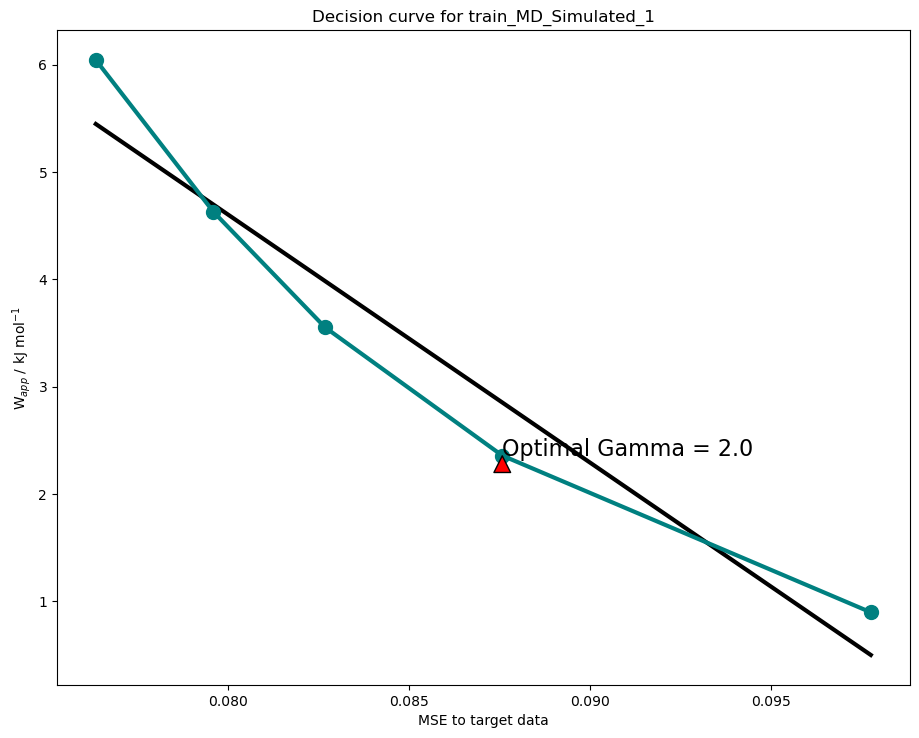

Optimal gamma for train_MD_Simulated_1 is 2.0x10^0
/home/alexi/Documents/ValDX/data/test_full_actually0.5_celeste_stride100_413_5reps_bigEXPrange6/train_MD_Simulated_1/reweighting_gamma_2x10^0final_segment_fractions.dat
Path /home/alexi/Documents/ValDX/data/test_full_actually0.5_celeste_stride100_413_5reps_bigEXPrange6/train_MD_Simulated_1/reweighting_gamma_2x10^0final_segment_fractions.dat
RW: ncol = 4, len(names) = 4
(20, 5)
     0.167      1.0     10.0    120.0  peptide
0  0.00018  0.00106  0.01056  0.11965        0
1  0.00068  0.00408  0.04004  0.38760        1
2  0.00906  0.05302  0.42001  0.99855        2
3  0.00059  0.00353  0.03478  0.34613        3
4  0.99971  1.00000  1.00000  1.00000        4
      0.167      1.0     10.0    120.0  peptide
0   0.00018  0.00106  0.01056  0.11965        0
1   0.00068  0.00408  0.04004  0.38760        1
2   0.00906  0.05302  0.42001  0.99855        2
3   0.00059  0.00353  0.03478  0.34613        3
4   0.99971  1.00000  1.00000  1.00000        4

/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


LogPf_by_res shape
(32,)
[0.70181818 0.61090909 0.53454545 0.5430303  0.33939394 0.36484848
 0.52363636 0.52606061 0.73575758 0.77818182 0.67878788 0.79515152
 0.53212121 0.62545455 0.64484848 0.71636364 0.49212121 0.63393939
 0.53454545 0.41575758 0.37333333 0.43272727 0.50666667 0.48363636
 0.58545455 0.68484848 0.5430303  0.5769697  0.68484848 0.67636364
 0.5830303  0.56606061]
dfracs_by_res_overtime shape
(4, 32)
[[1.         1.         1.         1.         1.         1.
  1.         0.99999889 1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.        ]
 [1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1

/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis

Path /home/alexi/Documents/ValDX/data/test_full_actually0.5_celeste_stride100_413_5reps_bigEXPrange6/train_MD_Simulated_2/out__train_MD_Simulated_2Segment_average_fractions.dat
AVG: ncol = 6, len(names) = 4
Experimental MD_Simulated True 2
/home/alexi/Documents/ValDX/data/test_full_actually0.5_celeste_stride100_413_5reps_bigEXPrange6/train_MD_Simulated_2/train_MD_Simulated_2_expt_dfracs.dat
/home/alexi/Documents/ValDX/data/test_full_actually0.5_celeste_stride100_413_5reps_bigEXPrange6/train_MD_Simulated_2
/home/alexi/Documents/ValDX/data/test_full_actually0.5_celeste_stride100_413_5reps_bigEXPrange6/train_MD_Simulated_2/out__train_MD_Simulated_2Intrinsic_rates.dat
REWIGHTING train_MD_Simulated_2 with Exponent: 0
[{'do_reweight': True, 'do_params': False, 'stepfactor': 0.001, 'basegamma': 1, 'predictHDX_dir': ['/home/alexi/Documents/ValDX/data/test_full_actually0.5_celeste_stride100_413_5reps_bigEXPrange6/train_MD_Simulated_2'], 'kint_file': '/home/alexi/Documents/ValDX/data/test_full_a

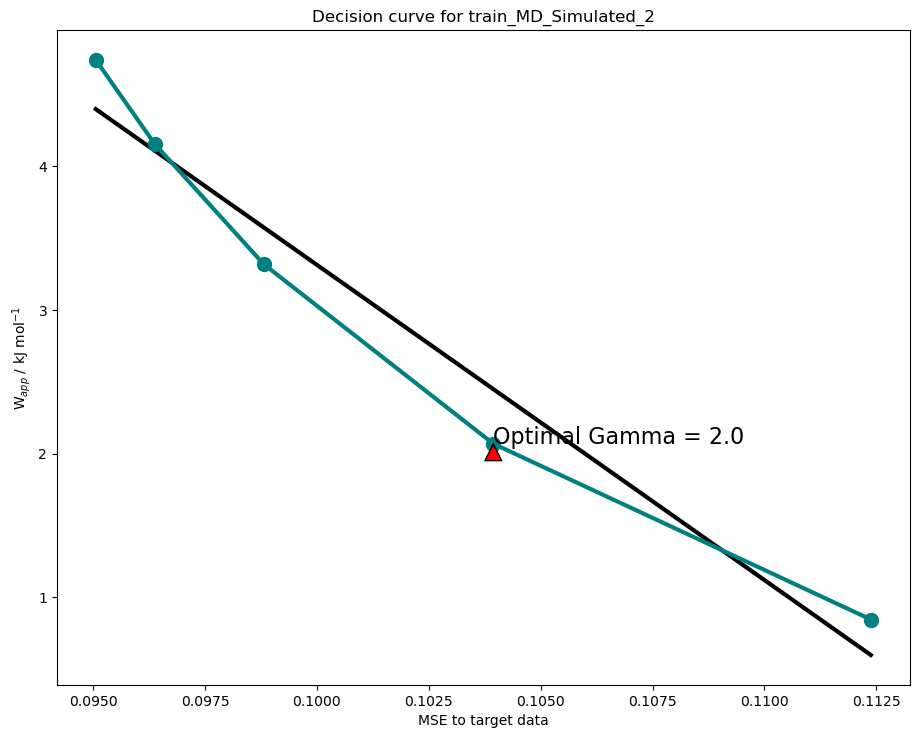

Optimal gamma for train_MD_Simulated_2 is 2.0x10^0
/home/alexi/Documents/ValDX/data/test_full_actually0.5_celeste_stride100_413_5reps_bigEXPrange6/train_MD_Simulated_2/reweighting_gamma_2x10^0final_segment_fractions.dat
Path /home/alexi/Documents/ValDX/data/test_full_actually0.5_celeste_stride100_413_5reps_bigEXPrange6/train_MD_Simulated_2/reweighting_gamma_2x10^0final_segment_fractions.dat
RW: ncol = 4, len(names) = 4
(20, 5)
     0.167      1.0     10.0    120.0  peptide
0  0.00195  0.01163  0.11036  0.75420        0
1  0.84610  0.99999  1.00000  1.00000        1
2  0.00205  0.01218  0.11537  0.77032        2
3  0.05853  0.30314  0.97299  1.00000        3
4  0.94236  1.00000  1.00000  1.00000        4
      0.167      1.0     10.0    120.0  peptide
0   0.00195  0.01163  0.11036  0.75420        0
1   0.84610  0.99999  1.00000  1.00000        1
2   0.00205  0.01218  0.11537  0.77032        2
3   0.05853  0.30314  0.97299  1.00000        3
4   0.94236  1.00000  1.00000  1.00000        4

/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


LogPf_by_res shape
(36,)
[0.47515152 0.70181818 0.61090909 0.53454545 0.5430303  0.32242424
 0.31393939 0.73575758 0.77818182 0.79515152 0.56848485 0.39030303
 0.46666667 0.53212121 0.62545455 0.71636364 0.49212121 0.63393939
 0.53454545 0.75272727 0.5769697  0.41575758 0.37333333 0.43272727
 0.50666667 0.48363636 0.58545455 0.68484848 0.65939394 0.5430303
 0.5769697  0.47515152 0.62545455 0.68484848 0.56606061 0.63393939]
dfracs_by_res_overtime shape
(4, 36)
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
    ResStr  ResEnd  peptide  \
21       4       5        0   
22       5       6   

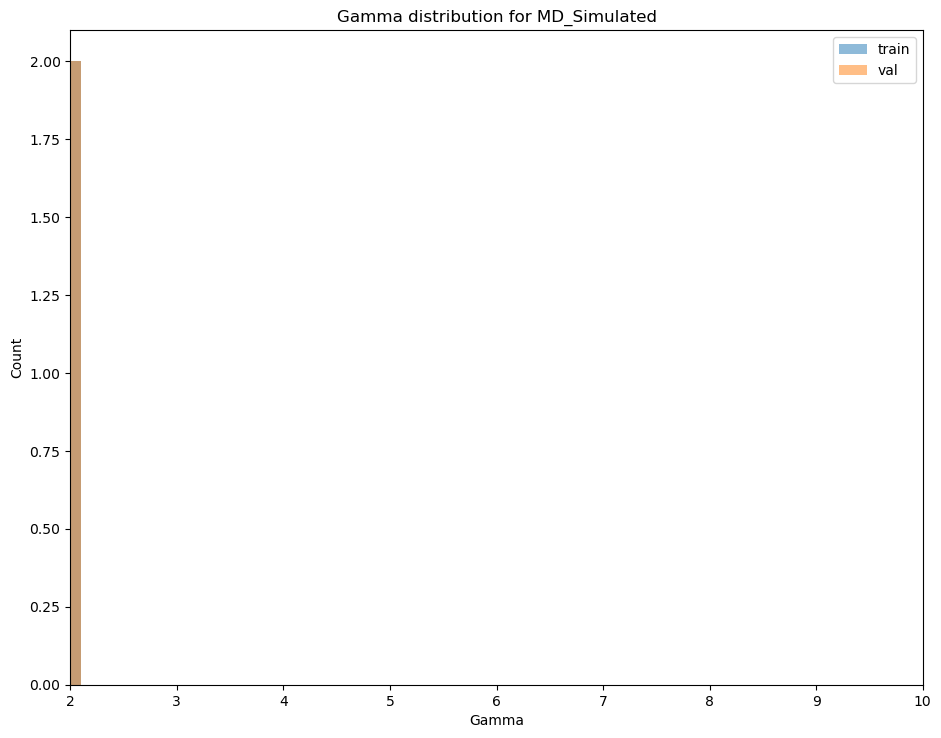

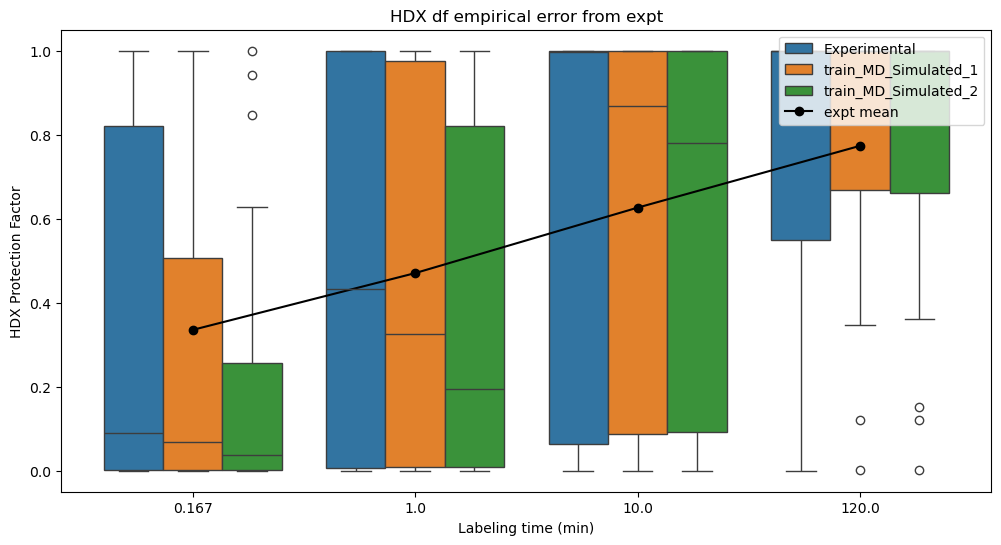

plot_dfracs_compare
       0.167      1.0     10.0  120.0  peptide            calc_name  ResStr  \
0    0.15669  0.63957  0.99996    1.0        0         Experimental     NaN   
1    0.09039  0.43293  0.99656    1.0        1         Experimental     NaN   
2    0.02665  0.14933  0.80157    1.0        2         Experimental     NaN   
3    0.18680  0.71010  1.00000    1.0        3         Experimental     NaN   
4    0.99880  1.00000  1.00000    1.0        4         Experimental     NaN   
..       ...      ...      ...    ...      ...                  ...     ...   
200  1.00000  1.00000  1.00000    1.0       36  test_MD_Simulated_2    51.0   
201  1.00000  1.00000  1.00000    1.0       37  test_MD_Simulated_2    52.0   
202  1.00000  1.00000  1.00000    1.0       38  test_MD_Simulated_2    53.0   
203  1.00000  1.00000  1.00000    1.0       39  test_MD_Simulated_2    54.0   
204  1.00000  1.00000  1.00000    1.0       40  test_MD_Simulated_2    55.0   

     ResEnd path  
0       NaN 

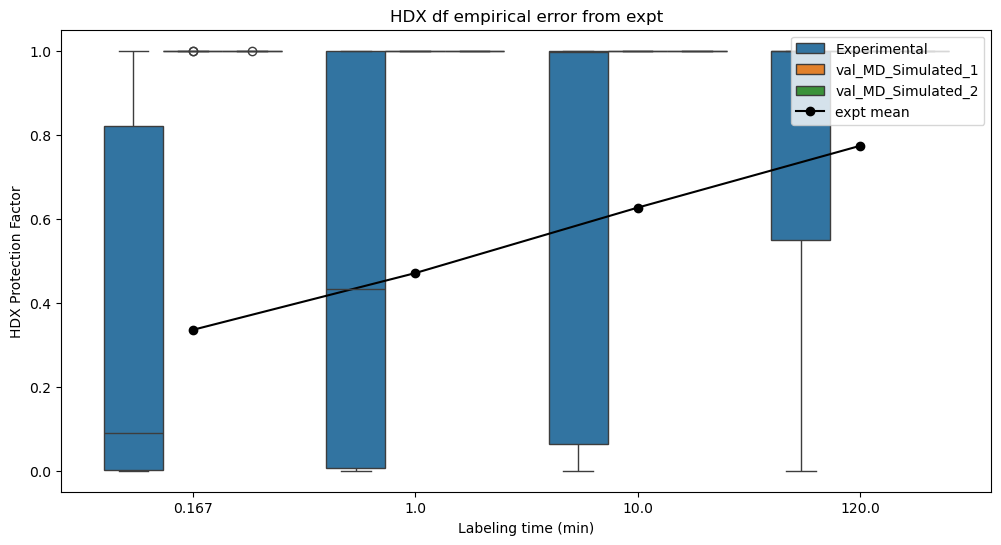

train_rep_names ['train_MD_Simulated_1', 'train_MD_Simulated_2']
val_rep_names ['val_MD_Simulated_1', 'val_MD_Simulated_2']
train_rep_peptides [24, 13, 8, 25, 4, 40, 19, 39, 29, 6, 26, 12, 17, 9, 15, 32, 16, 35, 34, 0]
val_rep_peptides [1, 2, 3, 5, 7, 10, 11, 14, 18, 20, 21, 22, 23, 27, 28, 30, 31, 33, 36, 37, 38]
train_rep_peptides [14, 5, 20, 26, 6, 24, 7, 29, 22, 38, 9, 13, 10, 31, 36, 8, 12, 37, 19, 40]
val_rep_peptides [0, 1, 2, 3, 4, 11, 15, 16, 17, 18, 21, 23, 25, 27, 28, 30, 32, 33, 34, 35, 39]
manual merge df
      0.167      1.0     10.0    120.0  peptide             calc_name  ResStr  \
0   0.00018  0.00106  0.01056  0.11965       24  train_MD_Simulated_1     NaN   
1   0.00068  0.00408  0.04004  0.38760       13  train_MD_Simulated_1     NaN   
2   0.00906  0.05302  0.42001  0.99855        8  train_MD_Simulated_1     NaN   
3   0.00059  0.00353  0.03478  0.34613       25  train_MD_Simulated_1     NaN   
4   0.99971  1.00000  1.00000  1.00000        4  train_MD_Simulated_1  

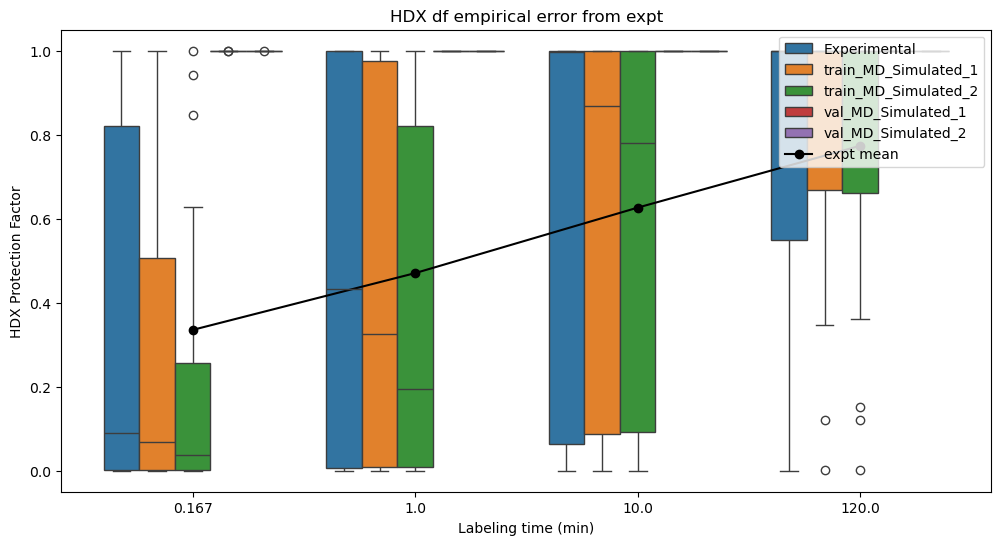

plotting paired errors
       0.167      1.0     10.0  120.0  peptide           calc_name  ResStr  \
0    0.15669  0.63957  0.99996    1.0        0        Experimental     NaN   
1    0.09039  0.43293  0.99656    1.0        1        Experimental     NaN   
2    0.02665  0.14933  0.80157    1.0        2        Experimental     NaN   
3    0.18680  0.71010  1.00000    1.0        3        Experimental     NaN   
4    0.99880  1.00000  1.00000    1.0        4        Experimental     NaN   
..       ...      ...      ...    ...      ...                 ...     ...   
118  1.00000  1.00000  1.00000    1.0       32  val_MD_Simulated_2    44.0   
119  1.00000  1.00000  1.00000    1.0       33  val_MD_Simulated_2    46.0   
120  1.00000  1.00000  1.00000    1.0       34  val_MD_Simulated_2    47.0   
121  1.00000  1.00000  1.00000    1.0       35  val_MD_Simulated_2    50.0   
122  1.00000  1.00000  1.00000    1.0       39  val_MD_Simulated_2    54.0   

     ResEnd                             

/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


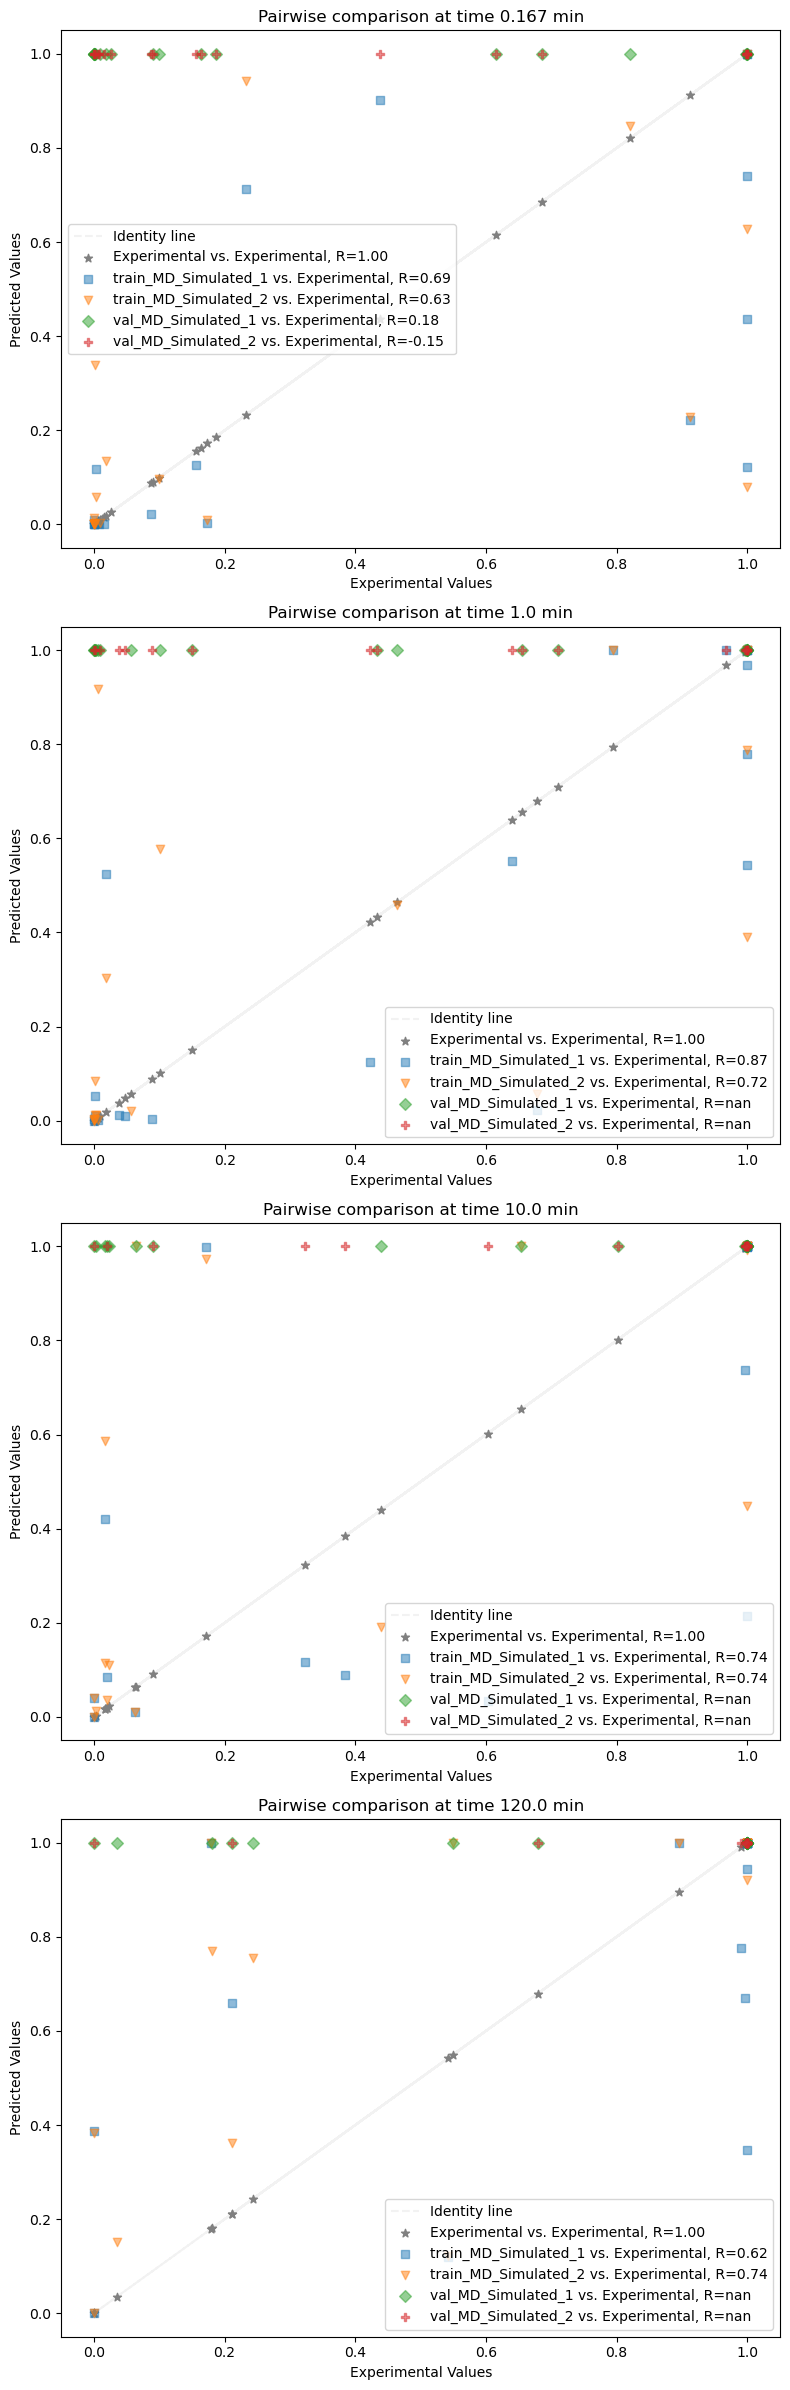

plotting paired trainval agreement
       0.167      1.0     10.0  120.0  peptide           calc_name  ResStr  \
0    0.15669  0.63957  0.99996    1.0        0        Experimental     NaN   
1    0.09039  0.43293  0.99656    1.0        1        Experimental     NaN   
2    0.02665  0.14933  0.80157    1.0        2        Experimental     NaN   
3    0.18680  0.71010  1.00000    1.0        3        Experimental     NaN   
4    0.99880  1.00000  1.00000    1.0        4        Experimental     NaN   
..       ...      ...      ...    ...      ...                 ...     ...   
118  1.00000  1.00000  1.00000    1.0       32  val_MD_Simulated_2    44.0   
119  1.00000  1.00000  1.00000    1.0       33  val_MD_Simulated_2    46.0   
120  1.00000  1.00000  1.00000    1.0       34  val_MD_Simulated_2    47.0   
121  1.00000  1.00000  1.00000    1.0       35  val_MD_Simulated_2    50.0   
122  1.00000  1.00000  1.00000    1.0       39  val_MD_Simulated_2    54.0   

     ResEnd                 

/home/alexi/Documents/ValDX/ValDX/HDX_plots.py:1340: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([[t, R, arg]], columns=["Time", "R", "calc_name"])])
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/alexi/Documents/ValDX/ValDX/HDX_plots.py:1359: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or a

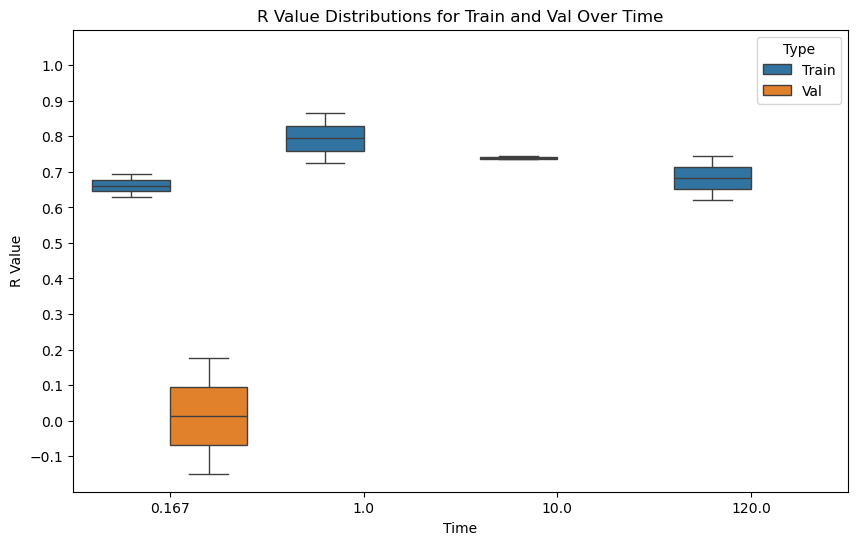

nan_df
       0.167      1.0     10.0    120.0  peptide             calc_name  \
0    0.00018  0.00106  0.01056  0.11965       24  train_MD_Simulated_1   
1    0.00068  0.00408  0.04004  0.38760       13  train_MD_Simulated_1   
2    0.00906  0.05302  0.42001  0.99855        8  train_MD_Simulated_1   
3    0.00059  0.00353  0.03478  0.34613       25  train_MD_Simulated_1   
4    0.99971  1.00000  1.00000  1.00000        4  train_MD_Simulated_1   
..       ...      ...      ...      ...      ...                   ...   
159  1.00000  1.00000  1.00000  1.00000       32    val_MD_Simulated_2   
160  1.00000  1.00000  1.00000  1.00000       33    val_MD_Simulated_2   
161  1.00000  1.00000  1.00000  1.00000       34    val_MD_Simulated_2   
162  1.00000  1.00000  1.00000  1.00000       35    val_MD_Simulated_2   
163  1.00000  1.00000  1.00000  1.00000       39    val_MD_Simulated_2   

     ResStr  ResEnd                                               path  
0       NaN     NaN            

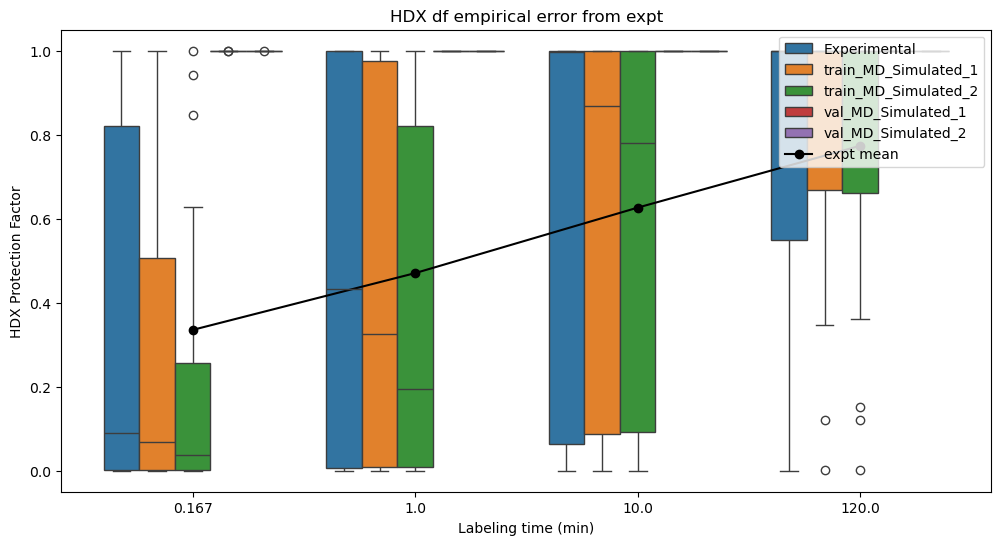

plot_dfracs_compare_abs
       0.167      1.0     10.0    120.0  peptide             calc_name  \
0    0.00018  0.00106  0.01056  0.11965       24  train_MD_Simulated_1   
1    0.00068  0.00408  0.04004  0.38760       13  train_MD_Simulated_1   
2    0.00906  0.05302  0.42001  0.99855        8  train_MD_Simulated_1   
3    0.00059  0.00353  0.03478  0.34613       25  train_MD_Simulated_1   
4    0.99971  1.00000  1.00000  1.00000        4  train_MD_Simulated_1   
..       ...      ...      ...      ...      ...                   ...   
200  0.00963  0.05627  0.43963  0.99904       36          Experimental   
201  0.01757  0.10068  0.65396  1.00000       37          Experimental   
202  0.09888  0.46390  0.99804  1.00000       38          Experimental   
203  0.00650  0.03831  0.32339  0.99079       39          Experimental   
204  0.17259  0.67841  0.99999  1.00000       40          Experimental   

     ResStr  ResEnd path  
0       NaN     NaN  NaN  
1       NaN     NaN  NaN  
2     

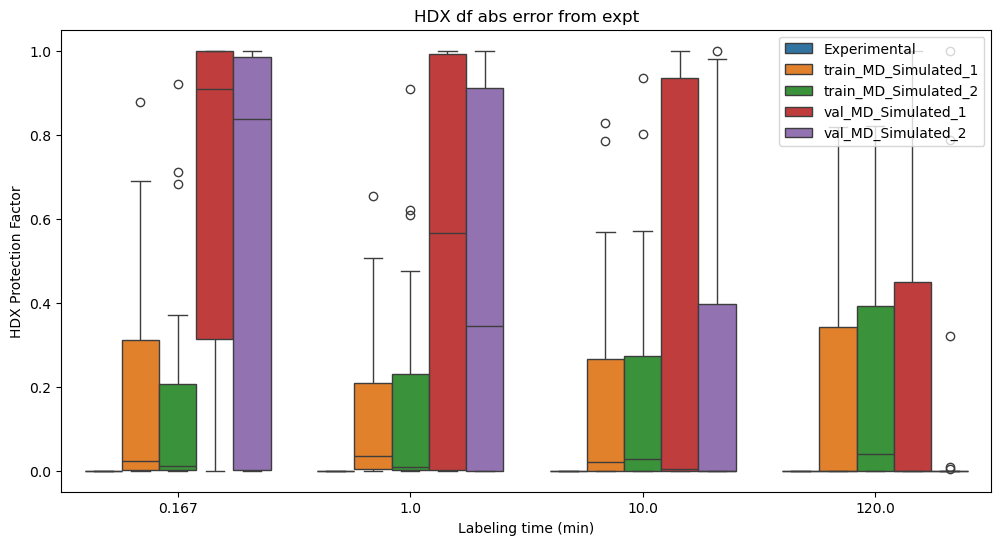

plot_dfracs_compare_MSE
       0.167      1.0     10.0    120.0  peptide             calc_name  \
0    0.00018  0.00106  0.01056  0.11965       24  train_MD_Simulated_1   
1    0.00068  0.00408  0.04004  0.38760       13  train_MD_Simulated_1   
2    0.00906  0.05302  0.42001  0.99855        8  train_MD_Simulated_1   
3    0.00059  0.00353  0.03478  0.34613       25  train_MD_Simulated_1   
4    0.99971  1.00000  1.00000  1.00000        4  train_MD_Simulated_1   
..       ...      ...      ...      ...      ...                   ...   
200  0.00963  0.05627  0.43963  0.99904       36          Experimental   
201  0.01757  0.10068  0.65396  1.00000       37          Experimental   
202  0.09888  0.46390  0.99804  1.00000       38          Experimental   
203  0.00650  0.03831  0.32339  0.99079       39          Experimental   
204  0.17259  0.67841  0.99999  1.00000       40          Experimental   

     ResStr  ResEnd path  
0       NaN     NaN  NaN  
1       NaN     NaN  NaN  
2     

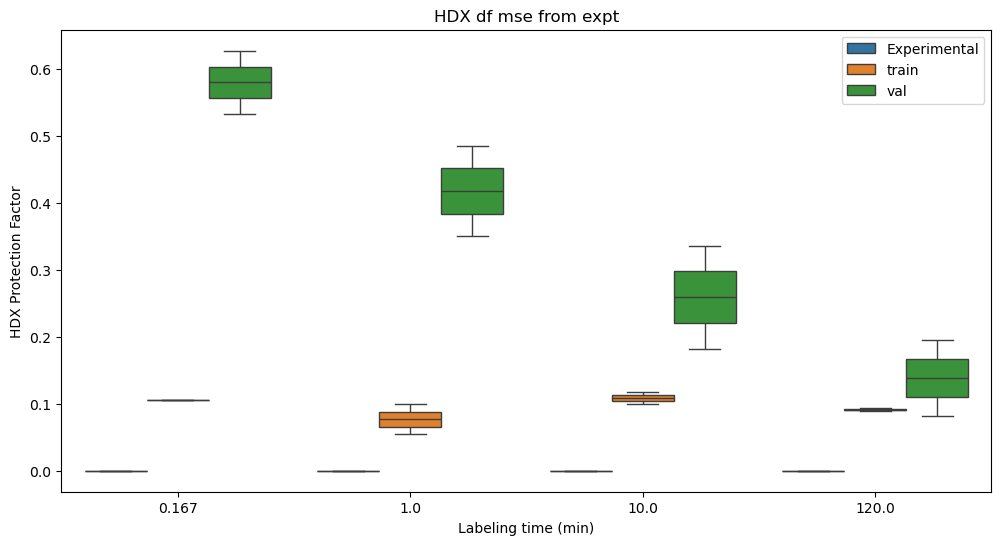

plotting paired errors
       0.167      1.0     10.0    120.0  peptide             calc_name  \
0    0.00018  0.00106  0.01056  0.11965       24  train_MD_Simulated_1   
1    0.00068  0.00408  0.04004  0.38760       13  train_MD_Simulated_1   
2    0.00906  0.05302  0.42001  0.99855        8  train_MD_Simulated_1   
3    0.00059  0.00353  0.03478  0.34613       25  train_MD_Simulated_1   
4    0.99971  1.00000  1.00000  1.00000        4  train_MD_Simulated_1   
..       ...      ...      ...      ...      ...                   ...   
200  0.00963  0.05627  0.43963  0.99904       36          Experimental   
201  0.01757  0.10068  0.65396  1.00000       37          Experimental   
202  0.09888  0.46390  0.99804  1.00000       38          Experimental   
203  0.00650  0.03831  0.32339  0.99079       39          Experimental   
204  0.17259  0.67841  0.99999  1.00000       40          Experimental   

     ResStr  ResEnd path  
0       NaN     NaN  NaN  
1       NaN     NaN  NaN  
2      

/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


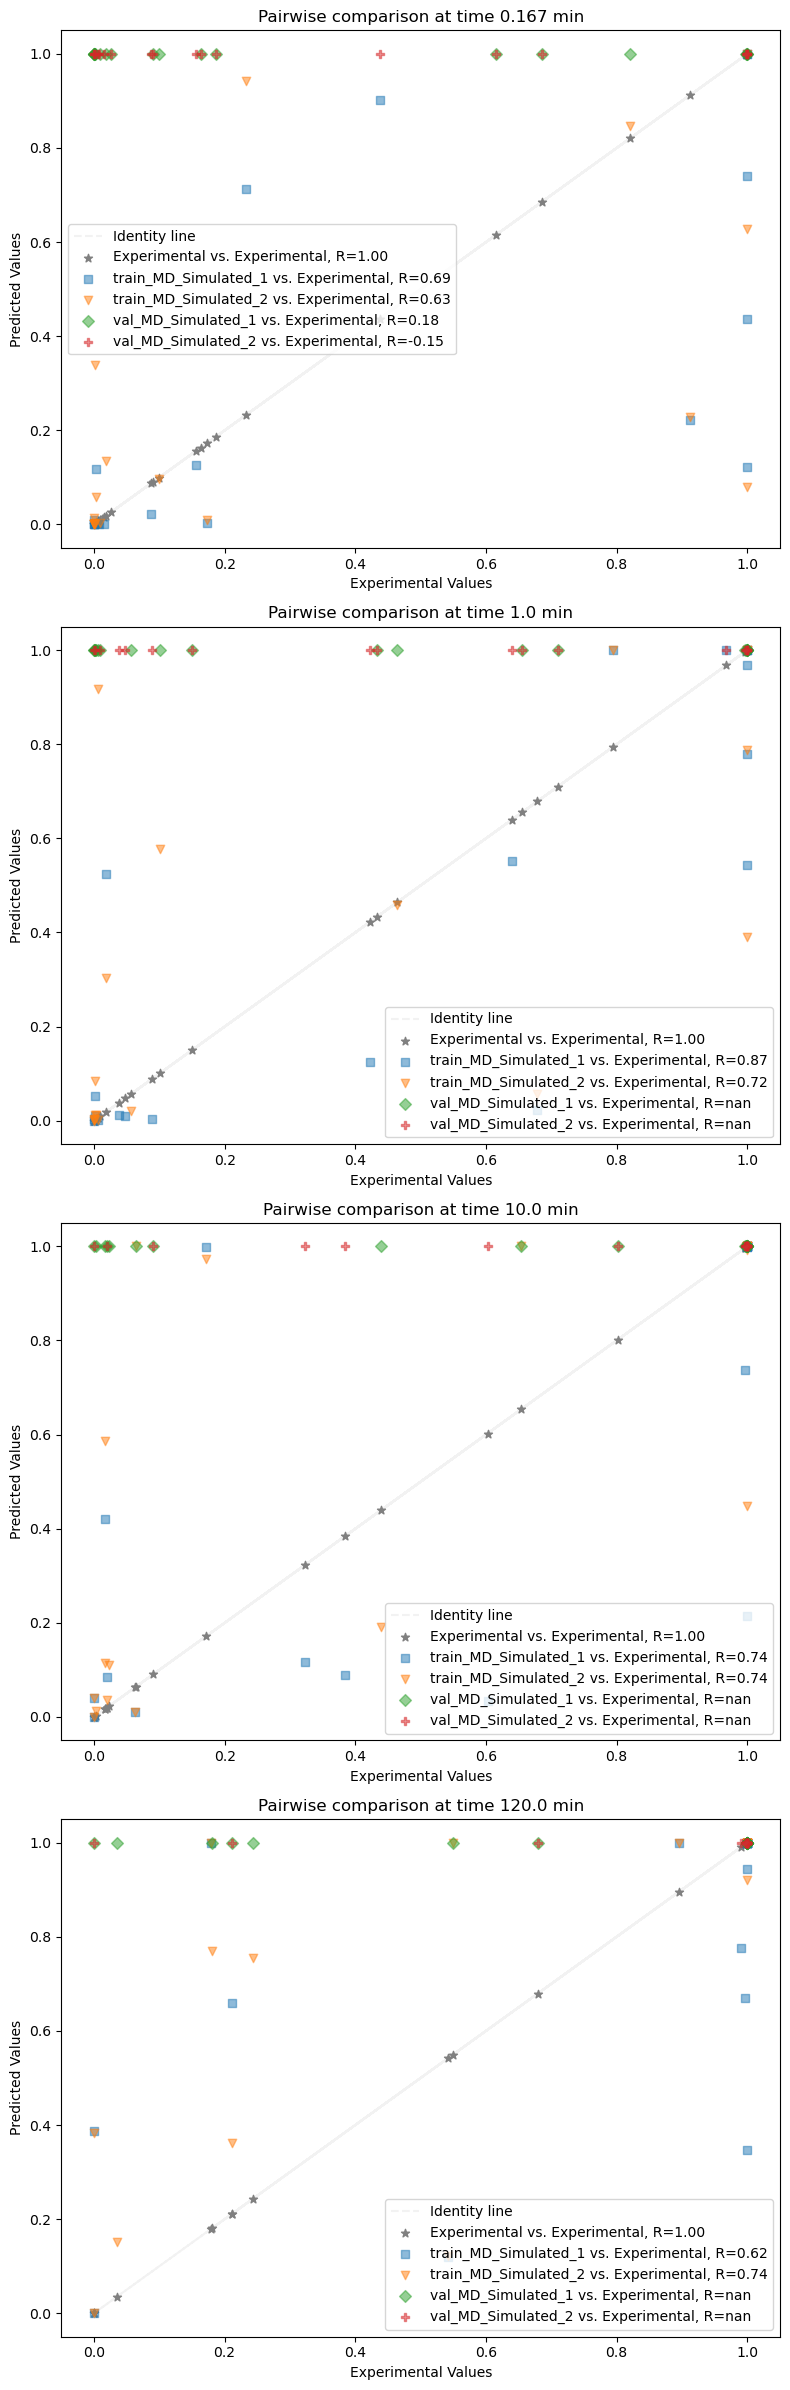

In [17]:
train_dfs, val_dfs, train_gammas, val_gammas = VDX.run_VDX(calc_name=test_name, expt_name=expt_name)

In [18]:
VDX.save_experiment()

dump = train_dfs, val_dfs, train_gammas, val_gammas

import pickle
with open(f'dump_{VDX.name}.pickle', 'wb') as f:
    print(f"Saving pickle", f'dump_{VDX.name}.pickle')
    pickle.dump(dump, f)

Saving experiment to:  logs/test_full_actually0.5_celeste_stride100_413_5reps_bigEXPrange6_1706542885.pkl
Saving pickle dump_test_full_actually0.5_celeste_stride100_413_5reps_bigEXPrange6.pickle


/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:442: UserWarning: Reader has no dt information, set to 1.0 ps
  pickle.dump(self, f)


In [19]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

In [ ]:

from ValDX.ValidationDX import ValDXer
from ValDX.VDX_Settings import Settings

settings = Settings()
# settings.replicates = 3
# settings.gamma_range = (2,10)
# settings.train_frac = 0.8
# settings.RW_exponent = [0]
# settings.stride = 1000
import pickle

VDX = ValDXer(settings)
expt_name = 'Experimental'
test_name = "MD_Simulated"


In [ ]:
VDX = VDX.load_experiment(load_path='logs/test_full0.5_celeste_stride100_413_5reps_bigEXPrange6_1706046605.pkl')

In [ ]:
with open('dump_test_full0.5_celeste_stride100_413_5reps_bigEXPrange6.pickle', 'rb') as f:
    dump = pickle.load(f)

train_dfs, val_dfs, train_gammas, val_gammas = dump

VDX.evaluate_HDX(train_dfs=train_dfs, 
                 val_dfs=val_dfs, 
                 calc_name=test_name,
                 expt_name=expt_name,
                 train_gammas=train_gammas, 
                 val_gammas=val_gammas, 
                 n_reps=VDX.settings.replicates,
                   )

In [ ]:
import pandas as pd

In [ ]:
# file_name = "covid_submissions_all_info.csv"

In [ ]:
# sub_test = pd.read_csv(file_name)

In [ ]:
# sub_test.columns.to_list()